# 1 Data Collection & Cleaning

## 1.4 Combining Energy Consumption & House Price Data with Location Data

## 1.4.1 LSOA Population Weighted Centroids

This notebook reads in the previously cleaned & combined LSOA Electricity Consumption & Residential Sales Price Data csv file (Part 1.3) and combines with Population Weighted Centroid Location data into a single data frame of a suitable shape to be read by the machine learning algorithms in the SciKit Learn library.

Libraries used include:

numpy - (scientific numerical package for Python that enables working with arrays) pandas - (data analysis library) matplotlib - (enables plotting and visualisation in Python) openpyxl / load_workbook (opens Excel xlsx files)

In [ ]:
#Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from openpyxl import load_workbook

Population Weighted Centroid Data is available from https://geoportal.statistics.gov.uk/datasets/b7c49538f0464f748dd7137247bbc41c_0 and licensed under Open Government Licence v3.0. The csv file is read in and unwanted columns are removed using the pd.drop function.

In [3]:
#Read in LSOA location data file and create new dataframe 

In [4]:
df_LSOA_Location = pd.read_csv('Lower_Layer_Super_Output_Areas__December_2011__Population_Weighted_Centroids.csv')

In [5]:
df_LSOA_Location.head()

,X,Y,objectid,lsoa11cd,lsoa11nm
0,449119.175,517017.509,1,E01012007,Middlesbrough 012A
1,451722.550,517577.735,2,E01012085,Middlesbrough 010D
2,448657.056,533984.633,3,E01012005,Hartlepool 014G
3,451977.348,517832.468,4,E01012084,Middlesbrough 010C
4,449565.447,533268.699,5,E01012002,Hartlepool 006D


In [6]:
#Drop unwanted columns of objectid and lsoa11nm

In [7]:
df_LSOA_Location = df_LSOA_Location.drop(columns=['objectid', 'lsoa11nm'])

In [8]:
df_LSOA_Location.head()

,X,Y,lsoa11cd
0,449119.175,517017.509,E01012007
1,451722.550,517577.735,E01012085
2,448657.056,533984.633,E01012005
3,451977.348,517832.468,E01012084
4,449565.447,533268.699,E01012002


Prior to combining the data frames, the new location data requires sorting by LSOA number and the column renaming to be consistent with the Energy Consumption & House Price data frame.

In [9]:
#Sort dataframe by lsoa code

In [10]:
df_LSOA_Location = df_LSOA_Location.sort_values(by=['lsoa11cd'])

In [11]:
df_LSOA_Location.head()

,X,Y,lsoa11cd
22841,532179.138,181797.700,E01000001
22836,532447.511,181803.973,E01000002
22838,532193.707,182070.351,E01000003
22834,533754.902,181103.272,E01000005
22829,544907.734,184320.781,E01000006


In [12]:
df_LSOA_Location = df_LSOA_Location.rename(columns={'lsoa11cd':'LSOA code'})

In [13]:
df_LSOA_Location.head()

,X,Y,LSOA code
22841,532179.138,181797.700,E01000001
22836,532447.511,181803.973,E01000002
22838,532193.707,182070.351,E01000003
22834,533754.902,181103.272,E01000005
22829,544907.734,184320.781,E01000006


## 1.4.2 Combining the data frames

The previously combined Energy Consumption & House Price data frame is read in and checked manually using the pd.head() function.

In [14]:
#Read in previously combined LSOA_Consumption & Mean house price data

In [15]:
df_LSOA_EnergyConsumption_ResPropertySales = pd.read_csv('1_DataCleaning/LSOAEnergyConsumption_ResPropertySales.csv')

In [16]:
df_LSOA_EnergyConsumption_ResPropertySales.head()

,Unnamed: 0,Local authority name,Local authority code,MSOA name,MSOA code,LSOA name,LSOA code,Total_number_of_domestic_electricity_meters,Total_domestic_electricity_consumption_kWh,Mean_domestic_electricity_consumption_kWh_per_meter,Median_domestic_electricity_consumption_kWh_per_meter,Year,Ratio_Consumption_per_Meter,Mean_price_paid
0,0,City of London,E09000001,City of London 001,E02000001,City of London 001A,E01000001,1058.0,4761532.5,4500.503308,3762.5,2010,4500.503308,567304.700990
1,1,City of London,E09000001,City of London 001,E02000001,City of London 001A,E01000001,1058.0,4700669.2,4442.976560,3790.6,2011,4442.976560,561361.228810
2,2,City of London,E09000001,City of London 001,E02000001,City of London 001A,E01000001,1057.0,4592456.4,4344.802649,3484.7,2012,4344.802649,571590.274818
3,3,City of London,E09000001,City of London 001,E02000001,City of London 001A,E01000001,1057.0,4459156.6,4218.691202,3661.1,2013,4218.691202,700060.972345
4,4,City of London,E09000001,City of London 001,E02000001,City of London 001A,E01000001,1057.0,4624139.0,4375.000000,3648.0,2014,4374.776727,757966.723837


Prior to combining using the pd.join() function a new data frame is set up.

In [17]:
#Merge the dataframes to add x,y OS coordinates to each LSOA entry

In [18]:
df_LSOA_Location_Energy_Sales = df_LSOA_EnergyConsumption_ResPropertySales

In [19]:
df_LSOA_Location_Energy_Sales = df_LSOA_Location.join(df_LSOA_Location_Energy_Sales.set_index('LSOA code'), on='LSOA code')

In [20]:
df_LSOA_Location_Energy_Sales.head(30)

,X,Y,LSOA code,Unnamed: 0,Local authority name,Local authority code,MSOA name,MSOA code,LSOA name,Total_number_of_domestic_electricity_meters,Total_domestic_electricity_consumption_kWh,Mean_domestic_electricity_consumption_kWh_per_meter,Median_domestic_electricity_consumption_kWh_per_meter,Year,Ratio_Consumption_per_Meter,Mean_price_paid
22841,532179.138,181797.700,E01000001,0.0,City of London,E09000001,City of London 001,E02000001,City of London 001A,1058.0,4761532.500,4500.503308,3762.50,2010.0,4500.503308,5.673047e+05
22841,532179.138,181797.700,E01000001,1.0,City of London,E09000001,City of London 001,E02000001,City of London 001A,1058.0,4700669.200,4442.976560,3790.60,2011.0,4442.976560,5.613612e+05
22841,532179.138,181797.700,E01000001,2.0,City of London,E09000001,City of London 001,E02000001,City of London 001A,1057.0,4592456.400,4344.802649,3484.70,2012.0,4344.802649,5.715903e+05
22841,532179.138,181797.700,E01000001,3.0,City of London,E09000001,City of London 001,E02000001,City of London 001A,1057.0,4459156.600,4218.691202,3661.10,2013.0,4218.691202,7.000610e+05
22841,532179.138,181797.700,E01000001,4.0,City of London,E09000001,City of London 001,E02000001,City of London 001A,1057.0,4624139.000,4375.000000,3648.00,2014.0,4374.776727,7.579667e+05
22841,532179.138,181797.700,E01000001,5.0,City of London,E09000001,City of London 001,E02000001,City of London 001A,1058.0,4575433.400,4324.606238,3667.60,2015.0,4324.606238,1.015192e+06
22841,532179.138,181797.700,E01000001,6.0,City of London,E09000001,City of London 001,E02000001,City of London 001A,1057.0,4372290.000,4136.508988,3509.20,2016.0,4136.508988,1.176204e+06
22841,532179.138,181797.700,E01000001,7.0,City of London,E09000001,City of London 001,E02000001,City of London 001A,1055.0,4332368.300,4106.510237,3409.40,2017.0,4106.510237,1.155397e+06
22841,532179.138,181797.700,E01000001,8.0,City of London,E09000001,City of London 001,E02000001,City of London 001A,1056.0,4397418.106,4164.221691,3535.25,2018.0,4164.221691,9.973600e+05
22836,532447.511,181803.973,E01000002,10.0,City of London,E09000001,City of London 001,E02000001,City of London 001B,796.0,3498193.300,4394.715201,3692.55,2010.0,4394.715201,6.013416e+05


A scatter plot is generated to visually check the data is as expected.

In [42]:
plt.rcParams['figure.figsize'] = [16, 10]

In [43]:
plt.style.use('seaborn-darkgrid')

In [47]:
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
matplotlib.rc('axes', labelsize=20) 
matplotlib.rc('axes', titlesize=20) 

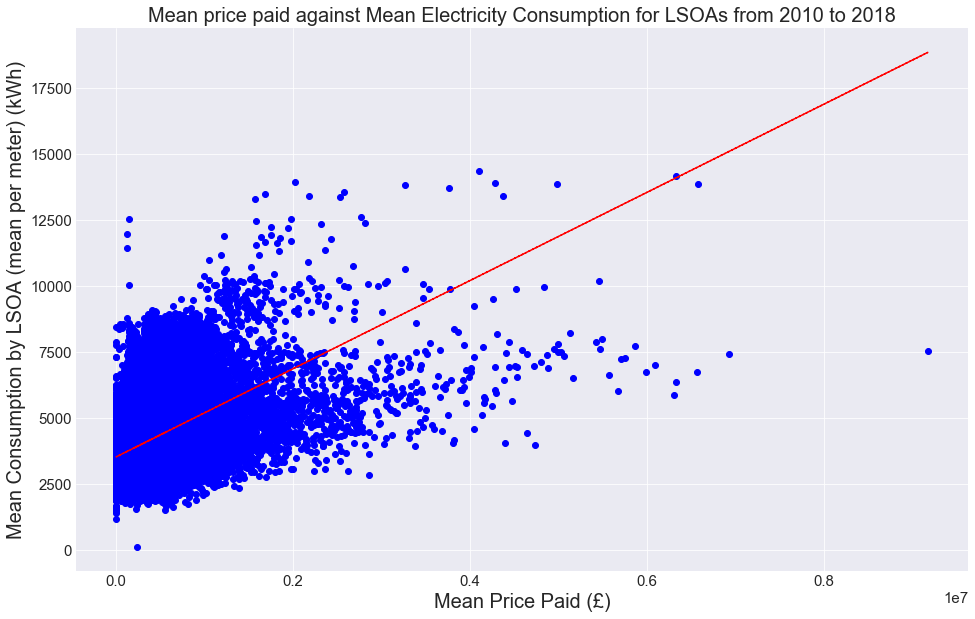

In [48]:
plt.scatter(df_LSOA_Location_Energy_Sales.Mean_price_paid, df_LSOA_Location_Energy_Sales.Mean_domestic_electricity_consumption_kWh_per_meter, color='blue')
plt.xlabel("Mean Price Paid (£)")
plt.ylabel("Mean Consumption by LSOA (mean per meter) (kWh)")
plt.title("Mean price paid against Mean Electricity Consumption for LSOAs from 2010 to 2018")
x=df_LSOA_Location_Energy_Sales['Mean_price_paid']
y=df_LSOA_Location_Energy_Sales['Mean_domestic_electricity_consumption_kWh_per_meter']

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

Likewise, the following pandas dataframe functions are run to visually check that the data frame is as expected:

1. .head() - displays the top entries
2. .tail() - displays the last entries
3. .info() - provides the number of entries / feature vectors, null objects and data types for each feature variable / column.
4. .describe() - provides a statistical overview
5. .idmax - displays the maximum value and feature vector for the requested column and is a useful manual check on potential outliers, enabling further removal/cleaning if required.

'NA' values are identified from these checks and subsequently removed - the 'NA' entries accounted for only 0.1% of the total number of feature vectors hence the decision to simply remove rather than investigate further.

In [22]:
df_LSOA_Location_Energy_Sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310225 entries, 22841 to 34108
Data columns (total 16 columns):
X                                                        310225 non-null float64
Y                                                        310225 non-null float64
LSOA code                                                310225 non-null object
Unnamed: 0                                               309906 non-null float64
Local authority name                                     309906 non-null object
Local authority code                                     309906 non-null object
MSOA name                                                309906 non-null object
MSOA code                                                309906 non-null object
LSOA name                                                309906 non-null object
Total_number_of_domestic_electricity_meters              309906 non-null float64
Total_domestic_electricity_consumption_kWh               309906 non-null float64
M

In [23]:
df_LSOA_Location_Energy_Sales.describe()

,X,Y,Unnamed: 0,Total_number_of_domestic_electricity_meters,Total_domestic_electricity_consumption_kWh,Mean_domestic_electricity_consumption_kWh_per_meter,Median_domestic_electricity_consumption_kWh_per_meter,Year,Ratio_Consumption_per_Meter,Mean_price_paid
count,310225.000000,310225.000000,309906.000000,309906.000000,3.099060e+05,309906.000000,309906.000000,309906.000000,309906.000000,3.099060e+05
mean,445695.158503,274859.017635,178615.700558,717.668419,2.802295e+06,3924.538483,3225.338794,2014.000000,3924.538533,2.420032e+05
std,89822.761263,125464.398439,108438.291406,167.695887,8.829593e+05,878.099952,648.908437,2.581993,878.099890,2.098538e+05
min,90590.596000,10638.171000,0.000000,21.000000,6.472580e+04,125.437597,882.750000,2010.000000,125.437597,0.000000e+00
25%,385652.507000,176456.379000,86084.250000,616.000000,2.243154e+06,3375.369049,2809.250000,2012.000000,3375.372644,1.319115e+05
50%,442055.155000,252547.407000,178040.000000,682.000000,2.580808e+06,3734.596863,3129.300000,2014.000000,3734.594925,1.936071e+05
75%,522272.683000,386922.604000,264124.750000,791.000000,3.110506e+06,4213.216663,3510.300000,2016.000000,4213.278633,2.894641e+05
max,655020.456000,654394.947000,413148.000000,6348.000000,1.620890e+07,14355.233560,10501.100000,2018.000000,14355.233562,9.178978e+06


In [24]:
pd.isna(df_LSOA_Location_Energy_Sales).sum()

X                                                          0
Y                                                          0
LSOA code                                                  0
Unnamed: 0                                               319
Local authority name                                     319
Local authority code                                     319
MSOA name                                                319
MSOA code                                                319
LSOA name                                                319
Total_number_of_domestic_electricity_meters              319
Total_domestic_electricity_consumption_kWh               319
Mean_domestic_electricity_consumption_kWh_per_meter      319
Median_domestic_electricity_consumption_kWh_per_meter    319
Year                                                     319
Ratio_Consumption_per_Meter                              319
Mean_price_paid                                          319
dtype: int64

In [25]:
df_LSOA_Location_Energy_Sales = df_LSOA_Location_Energy_Sales.dropna()

In [26]:
pd.isna(df_LSOA_Location_Energy_Sales).sum()

X                                                        0
Y                                                        0
LSOA code                                                0
Unnamed: 0                                               0
Local authority name                                     0
Local authority code                                     0
MSOA name                                                0
MSOA code                                                0
LSOA name                                                0
Total_number_of_domestic_electricity_meters              0
Total_domestic_electricity_consumption_kWh               0
Mean_domestic_electricity_consumption_kWh_per_meter      0
Median_domestic_electricity_consumption_kWh_per_meter    0
Year                                                     0
Ratio_Consumption_per_Meter                              0
Mean_price_paid                                          0
dtype: int64

In [27]:
df_LSOA_Location_Energy_Sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309906 entries, 22841 to 34108
Data columns (total 16 columns):
X                                                        309906 non-null float64
Y                                                        309906 non-null float64
LSOA code                                                309906 non-null object
Unnamed: 0                                               309906 non-null float64
Local authority name                                     309906 non-null object
Local authority code                                     309906 non-null object
MSOA name                                                309906 non-null object
MSOA code                                                309906 non-null object
LSOA name                                                309906 non-null object
Total_number_of_domestic_electricity_meters              309906 non-null float64
Total_domestic_electricity_consumption_kWh               309906 non-null float64
M

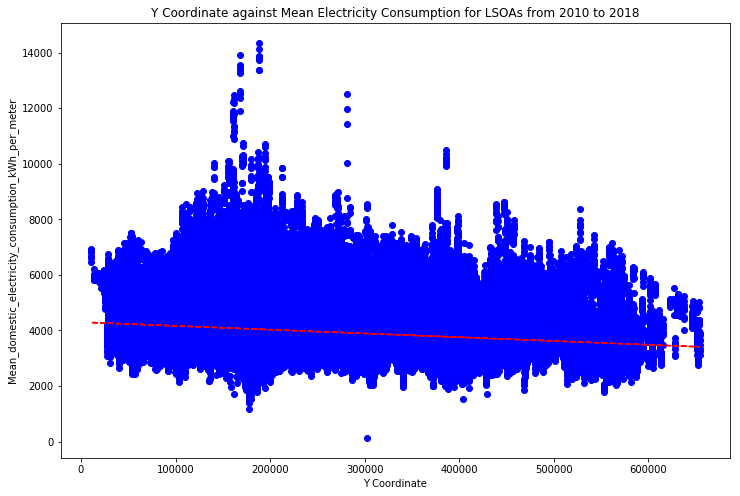

In [37]:
plt.scatter(df_LSOA_Location_Energy_Sales.Y, df_LSOA_Location_Energy_Sales.Mean_domestic_electricity_consumption_kWh_per_meter, color='blue')
plt.xlabel("Y Coordinate")
plt.ylabel("Mean_domestic_electricity_consumption_kWh_per_meter")
plt.title("Y Coordinate against Mean Electricity Consumption for LSOAs from 2010 to 2018")
x=df_LSOA_Location_Energy_Sales['Y']
y=df_LSOA_Location_Energy_Sales['Mean_domestic_electricity_consumption_kWh_per_meter']

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

Saves the data frame to the folder '1_DataCleaning' as a csv.

In [28]:
df_LSOA_Location_Energy_Sales.to_csv('1_DataCleaning/LSOA_Location_Energy_Sales.csv')